**Поведение пользователей мобильного приложения, А/А/В-тест**

**Цель исследования**: Изучить поведение пользователей мобильного приложения по продаже продуктов питания.

**Ход исследования**:

1. Загрузка данных, изучение общей информации.
2. Подготовка данных:
- изменение названий столбцов;
- проверка на пропуски, дубликаты, корректировка типов данных;
- добавление столбца даты и времени, столбца дат;
3. Изучение и проверка данных:
- Сколько всего событий в логе?
- Сколько всего пользователей в логе?
- Сколько в среднем событий приходится на пользователя?
- Период данных. Максимальная и минимальная дату. Гистограмма по дате и времени. Полные ли данные за период? Определение актуального периода.
- Определение количества событий и пользователей в актуальном периоде?
- Проверка пользователей на вхождение в 3 экспериментальные группы.
4. Изучение воронки событий:
- Изучение событий есть в логах, как часто они встречаются. Сортировка событий по частоте.
- Сколько пользователей совершали каждое из этих событий. Сортировка событий по числу пользователей, расчет доли пользователей, которые хоть раз совершали событие.
- Предположение о порядке событий. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
- Подсчет доли пользователей, проходящих на следующий шаг воронки. 
- На каком шаге теряется больше всего пользователей?
- Какая доля пользователей доходит от первого события до оплаты?
5. Изучение результатов эксперимента:
- Количество пользователей в каждой экспериментальной группе?
- Определение статистически значимой разницы между выборками 246 и 247, либо ее отсутствие.
- Выбор самого популярного события, анализирование. Проверка корректности разбиения на группы.
- Сравнение результатов каждой из контрольных групп в отдельности по каждому событию. Выводы из эксперимента.
- Сколько проверок статистических гипотез было сделано. Обоснование определения уровня значимости.

# **1. Загрузка данных, изучение общей информации**

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from plotly import graph_objects as go


In [2]:
import plotly.io as pio 
pio.renderers.default = "png" 
svg_renderer = pio.renderers["png"] 
svg_renderer.scale = 1.2

In [3]:
try:
    data = pd.read_csv('C:/Users/user/Desktop/123/ААВ тест/logs_exp.csv', sep='\t')
       
except:
    data = pd.read_csv('/datasets/logs_exp.csv', sep='\t')

In [4]:
data

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


Таблица содержит 4 столбца и 244126 строк. В таблице собраны данные о событиях, ID пользователей, время события в формате unix time и номер контрольной группы.

# **2. Подготовка данных**
## **2.1 Изменение названий столбцов**


Для удобства дальнейшей работы изменим названия столбцов на "event_name", "user_id", "event_timestamp" и "group_id".

In [5]:
data.columns = ['event_name', 'user_id', 'event_timestamp', 'group_id']

## **2.2 Проверка на пропуски, дубликаты, корректировка типов данных**

In [6]:
data.info()
print('Кол-во дубликатов', data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_name       244126 non-null  object
 1   user_id          244126 non-null  int64 
 2   event_timestamp  244126 non-null  int64 
 3   group_id         244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
Кол-во дубликатов 413


В таблице нет пропусков. Но имеется 413 дубликатов, это менее 0,17% от всех имеющихся данных, поэтому дубликаты можно удалить.
Столбец "event_timestamp" не приведен к формату времени, сделаем это в следующем шаге, когда будем работать с датами. С остальными столбцами можно работать, не меняя формат.

In [7]:
# удалим дубликаты
data = data.drop_duplicates()
data

,event_name,user_id,event_timestamp,group_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


## **2.3 Работа со столбцом времени, добавление столбца даты и времени, столбца дат**

In [8]:
# event_timestamp переведем в нужный формат времени и создадим новые слолбцы
data['event_datetime'] = pd.to_datetime(data['event_timestamp'], unit='s')
#data['event_date'] = pd.to_datetime(data['event_datetime']).dt.date
data['event_date'] = data['event_datetime'].astype('datetime64[D]')
#data['event_date'] = data['event_date'].dt.date
#data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_6848\3341054291.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_6848\3341054291.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       243713 non-null  object        
 1   user_id          243713 non-null  int64         
 2   event_timestamp  243713 non-null  int64         
 3   group_id         243713 non-null  int64         
 4   event_datetime   243713 non-null  datetime64[ns]
 5   event_date       243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 13.0+ MB


In [10]:
data

,event_name,user_id,event_timestamp,group_id,event_datetime,event_date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25 11:48:42
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07 21:12:25
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07 21:13:59
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07 21:14:43
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07 21:14:58


# **3. Изучение и проверка данных**

## **3.1 Сколько всего событий в логе**

In [11]:
print('Всего событий в логе:', data.shape[0])
print('Типов событий:', data['event_name'].nunique())

Всего событий в логе: 243713
Типов событий: 5


Всего в логе 243713 события. Уникальных типов (видов) событий 5.

## **3.2 Сколько всего пользователей в логе**

In [12]:
print('Пользователей в логе:', data['user_id'].nunique())

Пользователей в логе: 7551


## **3.3 Сколько в среднем событий приходится на пользователя**

In [13]:
round(data.shape[0] / data['user_id'].nunique(), 2)

32.28

В среднем, на пользователя приходится 32 события.

## **3.4 Период данных. Максимальная и минимальная дату. Гистограмма по дате и времени. Полные ли данные за период? Определение актуального периода**

In [14]:
#min date
min_date = data['event_datetime'].min()
#max date
max_date = data['event_datetime'].max()
#промежуток
delta_time = max_date - min_date

print('Минимальная дата:',min_date)
print('Максимальная дата:', max_date)
print('Период:', delta_time)

Минимальная дата: 2019-07-25 04:43:36
Максимальная дата: 2019-08-07 21:15:17
Период: 13 days 16:31:41


Данные представлены за период 13 дней, с 25.07.2019 по 07.08.2019.

<function matplotlib.pyplot.show(close=None, block=None)>

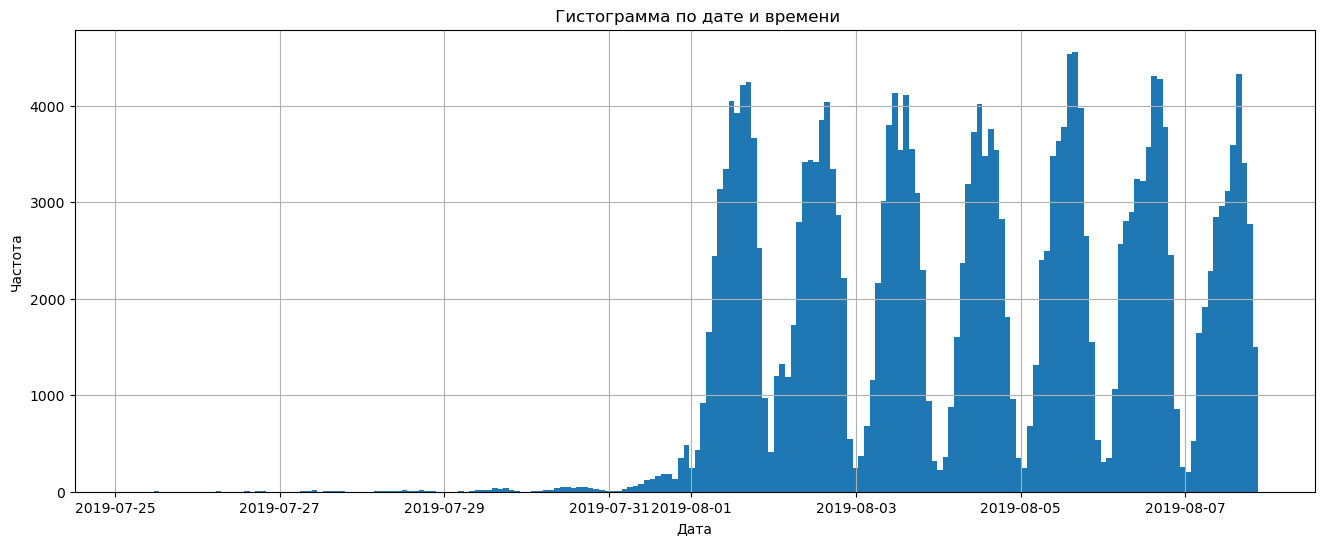

In [15]:
# строим гистограмму
plt.figure(figsize=(16,6))
data['event_datetime'].hist(bins=200)
plt.title(' Гистограмма по дате и времени')
plt.ylabel('Частота')
plt.xlabel('Дата')
#plt.xticks(rotation=30)
plt.show

По гистограмме видно: данные по времени распределены неравномерно. Оснвная доля событий зафиксирована в период 01.08.2019 - 07.08.2019, данные за первую неделю практически отсутствуют.  Примем за актуальный период времени 01.08.2019 - 07.08.2019.

In [16]:
#делаем срез
new_data = data.query('event_datetime >= "2019-08-01"')
new_data

,event_name,user_id,event_timestamp,group_id,event_datetime,event_date
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01 00:07:28
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01 00:08:00
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01 00:08:55
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01 00:08:58
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01 00:08:59
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07 21:12:25
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07 21:13:59
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07 21:14:43
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07 21:14:58


## **3.5 Определение количества событий и пользователей в актуальном периоде**

In [17]:
print('Всего событий в отфильтрованном логе:', new_data.shape[0])
print('Типов событий в отфильтрованном логе:', new_data['event_name'].nunique())
print('Пользователей в отфильтрованном логе:', new_data['user_id'].nunique())

Всего событий в отфильтрованном логе: 240887
Типов событий в отфильтрованном логе: 5
Пользователей в отфильтрованном логе: 7534


Сравним эти данные с полученными ранее.

In [18]:
print('Событий в логе до фильтрации: {}'.format(data.shape[0]))
print('Событий в логе после фильтрации: {}'.format(new_data.shape[0]))
print('Количество удалённых событий: {} '.format(data.shape[0] - new_data.shape[0]))
print('Процент изменений: {:.2%}'.format(new_data.shape[0] / data.shape[0] - 1))

Событий в логе до фильтрации: 243713
Событий в логе после фильтрации: 240887
Количество удалённых событий: 2826 
Процент изменений: -1.16%


In [19]:
print('Пользователей в логе до фильтрации: {}'.format(data['user_id'].nunique()))
print('Пользователей в логе после фильтрации: {}'.format(new_data['user_id'].nunique()))
print('Количество удалённых пользователей: {} '.format(data['user_id'].nunique() - new_data['user_id'].nunique()))
print('Процент изменений: {:.2%}'.format(new_data['user_id'].nunique() / data['user_id'].nunique() - 1))

Пользователей в логе до фильтрации: 7551
Пользователей в логе после фильтрации: 7534
Количество удалённых пользователей: 17 
Процент изменений: -0.23%


Количество событий в логе уменьшилось на 1,16%, количество пользователей уменьшилось на 0,23%. Вцелом, изменения несущественные. Можно продолжать работу с отфильтрованными данными.

## **3.6 Проверка пользователей на вхождение в 3 экспериментальные группы**


In [20]:
new_data.groupby('group_id')['user_id'].nunique()

group_id
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

Пользователи есть в каждой из 3 экспериментальных групп.

# **4. Изучение воронки событий**
## **4.1 Изучение событий есть в логах, как часто они встречаются. Сортировка событий по частоте**


In [21]:
new_data.head()

,event_name,user_id,event_timestamp,group_id,event_datetime,event_date
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01 00:07:28
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01 00:08:00
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01 00:08:55
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01 00:08:58
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01 00:08:59


In [22]:
new_data.groupby('event_name').agg({'user_id':'count'}).sort_values(by='user_id', ascending=False)

,user_id
event_name,
MainScreenAppear,117328
OffersScreenAppear,46333
CartScreenAppear,42303
PaymentScreenSuccessful,33918
Tutorial,1005


В логе представлено пять вариантов событий:
- MainScreenAppear - просмотр главного экрана;
- OffersScreenAppear - просмотр экрана с продуктами;
- CartScreenAppear - просмотр экрана с корзиной;
- PaymentScreenSuccessful - просмотр экрана с подтверждением оплаты;
- Tutorial - просмотр экрана с обучением.

Наибольшее число событий приходится на просмотр главного экрана (117328 просмотров), наименьшее на обучение (1005).

## **4.2 Сколько пользователей совершали каждое из этих событий. Сортировка событий по числу пользователей, расчет доли пользователей, которые хоть раз совершали событие**

In [23]:
user_events = new_data.groupby('event_name').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending=False)
user_events = user_events.reset_index()
user_events.columns = ['event_name', 'qty_users']
user_events['persent_of_users'] = (user_events['qty_users'] / new_data['user_id'].nunique() *100).round(2)
user_events

,event_name,qty_users,persent_of_users
0,MainScreenAppear,7419,98.47
1,OffersScreenAppear,4593,60.96
2,CartScreenAppear,3734,49.56
3,PaymentScreenSuccessful,3539,46.97
4,Tutorial,840,11.15


Лишь 11,5 % пользователей проходили обучение, главный экран просмотрели 98,47% всех посетивших сайт.

## **4.3 Предположение о порядке событий. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки**

Воронка событий выглядит следующим образом:
1. MainScreenAppear - просмотр главного экрана;
2. OffersScreenAppear - просмотр страницы с товаром;
3. CartScreenAppear - просмотр корзины;
4. PaymentScreenSuccessful - просмотр экрана с подтверждением оплаты.
5. Tutorial - обучение.

Возможно, просмотр страницы с обучением не является обязательным при работе с сайтом.

Скорее всего события расположены в следующем порядке:
1. MainScreenAppear - просмотр главного экрана;
2. OffersScreenAppear - просмотр страницы с товаром;
3. CartScreenAppear - просмотр корзины;
4. PaymentScreenSuccessful - просмотр экрана с подтверждением оплаты.

Этап Tutorial лишний, так как обязательным не является и не влияет на то, дойдет ли пользователь до покупки или нет. Уберем этат этап из анализа.

In [24]:
final_data = new_data.query('event_name != "Tutorial"')
final_data

,event_name,user_id,event_timestamp,group_id,event_datetime,event_date
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01 00:08:00
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01 00:08:55
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01 00:08:58
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01 00:08:59
2833,MainScreenAppear,4899590676214355127,1564618215,247,2019-08-01 00:10:15,2019-08-01 00:10:15
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07 21:12:25
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07 21:13:59
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07 21:14:43
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07 21:14:58


## **4.4 Подсчет доли пользователей, проходящих на следующий шаг воронки. На каком шаге теряется больше всего пользователей? Какая доля пользователей доходит от первого события до оплаты?**

Создадим таблицу с данными о количестве событий, количестве уникальных пользователей и доле пользователей, переходящих на следующий шаг воронки событий

In [25]:
final_user_events = final_data.groupby('event_name').agg({'event_name':'count', 'user_id':'nunique'}).sort_values(by='user_id', ascending=False)
final_user_events.columns = ['qty_events', 'qty_users']
final_user_events = final_user_events.reset_index() 
final_user_events['persent'] = (final_user_events['qty_users'] / 
                                final_user_events['qty_users']
                                .shift(1, fill_value=1*final_user_events['qty_users'][0])*100).round(2)

final_user_events

,event_name,qty_events,qty_users,persent
0,MainScreenAppear,117328,7419,100.00
1,OffersScreenAppear,46333,4593,61.91
2,CartScreenAppear,42303,3734,81.30
3,PaymentScreenSuccessful,33918,3539,94.78


Построим воронкообразную диаграмму для нагрядного представления воронки событий.

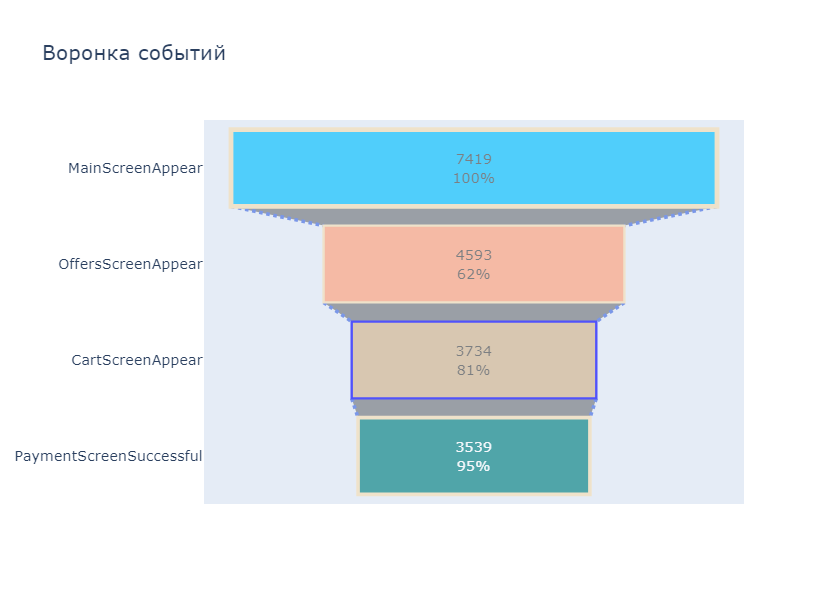

In [26]:
fig = go.Figure(go.Funnel(
    y = final_user_events['event_name'],
    x = final_user_events['qty_users'],
    textposition = "inside",
    textinfo = "value+percent previous",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )
fig.update_layout(title="Воронка событий")
fig.show("png")

Большишое число пользователей приложение теряет при переходе с главной страницы на страницы товаров, лишь 61,9% пользователей переходит на второй этап.  
От просмотра страниц до просмотра корзины доходит уже 81,3% пользователей, просмотревших товары в приложении.  
94,8% просмотревших корзину оплачивают товар.  
От первого этапа до этапа успешной оплаты, доходит 47,7% пользователей. Почти половина, достаточно неплохой показатель.

# **5. Изучение результатов эксперимента**
## **5.1 Количество пользователей в каждой экспериментальной группе**

In [27]:
group = final_data.groupby('group_id').agg({'user_id':'nunique'}).reset_index()
group['persent'] = (group['user_id'] / group['user_id'].sum() *100).round(2)
group

,group_id,user_id,persent
0,246,2483,32.97
1,247,2512,33.36
2,248,2535,33.67


В каждой группе практически равное количество пользователей. Проверим, не пересекаются ли пользователи между собой.

In [28]:
# подсчитаем, в скольки группах состоит каждый из пользователей 
v = final_data.groupby('user_id')['group_id'].nunique()
# подсчитаем, сколько пользователей попали в обе группы
v.reset_index().query('group_id > 1').count()

user_id     0
group_id    0
dtype: int64

Пересекающихся пользователей не обнаружено.

## **5.2 Определение статистически значимой разницы между выборками 246 и 247, либо ее отсутствие**

Проверим, находят ли статистические критерии разницу между выборками 246 и 247. Для этого сформируем таблицу с информацией по событиям по каждой группе.

In [29]:
# сформируем сводную таблицу
users_by_events = (
    final_data
    .pivot_table(index = 'group_id',
                 columns = 'event_name',
                 values = 'user_id',
                 aggfunc = 'nunique'))

users_by_events = users_by_events.reset_index()

users_by_events = users_by_events.merge(group, left_on='group_id', right_on='group_id', how='left')
users_by_events = users_by_events.iloc [: , : -1]
users_by_events = users_by_events.rename(columns = {'user_id':'total_users'})
users_by_events

,group_id,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,total_users
0,246,1266,2450,1542,1200,2483
1,247,1238,2476,1520,1158,2512
2,248,1230,2493,1531,1181,2535


In [30]:
# дополнение таблицы информацией по объединенной контрольной группе
row_246_247 = users_by_events.loc[0] + users_by_events.loc[1]
users_by_events = users_by_events.append([row_246_247]).reset_index(drop=True)
users_by_events.iloc[3,0] = '246_247'
users_by_events

C:\Users\user\AppData\Local\Temp\ipykernel_6848\2884572514.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,group_id,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,total_users
0,246,1266,2450,1542,1200,2483
1,247,1238,2476,1520,1158,2512
2,248,1230,2493,1531,1181,2535
3,246_247,2504,4926,3062,2358,4995


In [31]:
# напишем функцию для проверки гипотезы о равенстве долей
def z_test(event_1, event_2, total_1, total_2, alpha):  
    share_1 = event_1 / total_1 
    share_2 = event_2 / total_2 
    share_combined = (event_1 + event_2) / (total_1 + total_2) 
    diff = share_1 - share_2 
    z_value = diff / (share_combined * (1 - share_combined) * (1/total_1 + 1/total_2)) ** 0.5
    dist = stats.norm(0, 1) 
    p_value = 2 * (1 - dist.cdf(abs(z_value)))
    print('p-значение: ', p_value)
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 


Сформулируем гипотезы:
- Н0 - статистически значимой разницы между выборками 246 и 247 отсутствует, выборки равны;
- Н1 - есть статистически значимая разница между выборками 246 и 247, доли разные.

In [32]:
column_list = [1, 2, 3, 4]
for i in column_list:
    print('Проверка гипотезы о различиях в долях клиентов по событию', users_by_events.columns[i], 'в группах 246 и 247')
    z_test (users_by_events.iloc[0,i],
           users_by_events.iloc[1,i],
           users_by_events.iloc[0,5],
           users_by_events.iloc[1,5], 0.05)
    print('')
    

Проверка гипотезы о различиях в долях клиентов по событию CartScreenAppear в группах 246 и 247
p-значение:  0.22867643757335676
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Проверка гипотезы о различиях в долях клиентов по событию MainScreenAppear в группах 246 и 247
p-значение:  0.7526703436483038
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Проверка гипотезы о различиях в долях клиентов по событию OffersScreenAppear в группах 246 и 247
p-значение:  0.24786096925282264
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Проверка гипотезы о различиях в долях клиентов по событию PaymentScreenSuccessful в группах 246 и 247
p-значение:  0.11446627829276612
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



A/A тест проведен корректно. Ни для одного из событий разница не оказалось статистически значимой. Обе эти группы можно считать контрольными.

## **5.3 Выбор самого популярного события, его анализ**

При построении воронки мы уже считали количество событий, произошедших в приложении.

In [33]:
final_user_events

,event_name,qty_events,qty_users,persent
0,MainScreenAppear,117328,7419,100.00
1,OffersScreenAppear,46333,4593,61.91
2,CartScreenAppear,42303,3734,81.30
3,PaymentScreenSuccessful,33918,3539,94.78


Самое популярное событие - MainScreenAppear - появление главного экрана. За анализируемый период главный экран просмотрели 117328 раз. Определим количество пользователей в группах, совершивших данное событие и их доли от общего количества пользователей по группам.

In [34]:
top_event = users_by_events[['group_id', 'MainScreenAppear', 'total_users']].copy()
top_event['share'] = round(top_event['MainScreenAppear'] / top_event['total_users'], 4)
top_event

,group_id,MainScreenAppear,total_users,share
0,246,2450,2483,0.9867
1,247,2476,2512,0.9857
2,248,2493,2535,0.9834
3,246_247,4926,4995,0.9862


Из группы теста 246 главный экран приложения просмотрели 98,67% пользователей, в группе 247 -  98,57%.

Статистически значимая разница между выборками отсутствует. Статистический тест по всем событиям был выполнен ранее.  
A/A тест проведен корректно. Распределение на группы корректное.

## **5.4 Результаты А/В эксперимента**

Проверим, есть ли статистически значимая разница в каждом из событий по группам 246, 247, объединенной группой 246_247 с группой с с изменённым шрифтом - 248.

In [35]:
users_by_events

,group_id,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,total_users
0,246,1266,2450,1542,1200,2483
1,247,1238,2476,1520,1158,2512
2,248,1230,2493,1531,1181,2535
3,246_247,2504,4926,3062,2358,4995


In [36]:
column_list = [1, 2, 3, 4]
for i in column_list:
    print('Проверка гипотезы о различиях в долях клиентов по событию', users_by_events.columns[i], 'в группах 246 и 248')
    z_test (users_by_events.iloc[0,i],
           users_by_events.iloc[2,i],
           users_by_events.iloc[0,5],
           users_by_events.iloc[2,5], 0.05)
    print('')
    print('Проверка гипотезы о различиях в долях клиентов по событию', users_by_events.columns[i], 'в группах 247 и 248')
    z_test (users_by_events.iloc[1,i],
           users_by_events.iloc[2,i],
           users_by_events.iloc[1,5],
           users_by_events.iloc[2,5], 0.05)
    print('')
    print('Проверка гипотезы о различиях в долях клиентов по событию', users_by_events.columns[i], 'в группах 246_247 и 248')
    z_test (users_by_events.iloc[3,i],
           users_by_events.iloc[2,i],
           users_by_events.iloc[3,5],
           users_by_events.iloc[2,5], 0.05)
    print('')
    print('')

Проверка гипотезы о различиях в долях клиентов по событию CartScreenAppear в группах 246 и 248
p-значение:  0.08067367598823139
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Проверка гипотезы о различиях в долях клиентов по событию CartScreenAppear в группах 247 и 248
p-значение:  0.5878284605111943
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Проверка гипотезы о различиях в долях клиентов по событию CartScreenAppear в группах 246_247 и 248
p-значение:  0.18683558686831558
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Проверка гипотезы о различиях в долях клиентов по событию MainScreenAppear в группах 246 и 248
p-значение:  0.3387114076159288
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Проверка гипотезы о различиях в долях клиентов по событию MainScreenAppear в группах 247 и 248
p-значение:  0.5194964354051703
Не получилось отвергнуть нулевую гипотезу,

Статистически значимой разницы между группами во всех тестах не выявлено.


## **5.5 Обоснование определения уровня значимости**

Мы провели множественный тест, то есть брали несколько выборок из одного и того же набора данных. При множественном тестировании важно помнить, что с каждой новой проверкой гипотезы растёт вероятность ошибки первого рода. 
Чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез, применяют метод Шидака (как один из наиболее точных) для корректировки уровня значимости для уменьшения групповой вероятности ошибки первого рода.

Было сделано 16 проверок статистических гипотез: 4 проверки в контрольных группах и 12 тестов при нахождении статистических различий в измененной и контрольных группах.


In [37]:
print('Уточненный уровень alpha', 1-(1-0.05)**(1/16))

Уточненный уровень alpha 0.0032006977101884937


Результаты проведенных z-тестов не изменятся не изменятся. Во всех проверках p-value > alpha, при снижении уровня alpha до 0,0032 результаты тестирования не изменятся.


In [38]:
column_list = [1, 2, 3, 4]
for i in column_list:
    print('Проверка гипотезы о различиях в долях клиентов по событию', users_by_events.columns[i], 'в группах 246 и 247')
    z_test (users_by_events.iloc[0,i],
           users_by_events.iloc[1,i],
           users_by_events.iloc[0,5],
           users_by_events.iloc[1,5], 0.003)
    print('')

Проверка гипотезы о различиях в долях клиентов по событию CartScreenAppear в группах 246 и 247
p-значение:  0.22867643757335676
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Проверка гипотезы о различиях в долях клиентов по событию MainScreenAppear в группах 246 и 247
p-значение:  0.7526703436483038
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Проверка гипотезы о различиях в долях клиентов по событию OffersScreenAppear в группах 246 и 247
p-значение:  0.24786096925282264
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Проверка гипотезы о различиях в долях клиентов по событию PaymentScreenSuccessful в группах 246 и 247
p-значение:  0.11446627829276612
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



In [39]:
column_list = [1, 2, 3, 4]
for i in column_list:
    print('Проверка гипотезы о различиях в долях клиентов по событию', users_by_events.columns[i], 'в группах 246 и 248')
    z_test (users_by_events.iloc[0,i],
           users_by_events.iloc[2,i],
           users_by_events.iloc[0,5],
           users_by_events.iloc[2,5], 0.003)
    print('')

for i in column_list:    
    print('Проверка гипотезы о различиях в долях клиентов по событию', users_by_events.columns[i], 'в группах 247 и 248')
    z_test (users_by_events.iloc[1,i],
           users_by_events.iloc[2,i],
           users_by_events.iloc[1,5],
           users_by_events.iloc[2,5], 0.003)
    print('')
    
for i in column_list:    
    print('Проверка гипотезы о различиях в долях клиентов по событию', users_by_events.columns[i], 'в группах 246_247 и 248')
    z_test (users_by_events.iloc[3,i],
           users_by_events.iloc[2,i],
           users_by_events.iloc[3,5],
           users_by_events.iloc[2,5], 0.003)
    print('')
    print('')    

Проверка гипотезы о различиях в долях клиентов по событию CartScreenAppear в группах 246 и 248
p-значение:  0.08067367598823139
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Проверка гипотезы о различиях в долях клиентов по событию MainScreenAppear в группах 246 и 248
p-значение:  0.3387114076159288
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Проверка гипотезы о различиях в долях клиентов по событию OffersScreenAppear в группах 246 и 248
p-значение:  0.21442476639710506
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Проверка гипотезы о различиях в долях клиентов по событию PaymentScreenSuccessful в группах 246 и 248
p-значение:  0.21693033984516674
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Проверка гипотезы о различиях в долях клиентов по событию CartScreenAppear в группах 247 и 248
p-значение:  0.5878284605111943
Не получилось отвергнуть нулевую гипо

# **Вывод**

Задача проекта - разобраться, как ведут себя пользователи мобильного приложения по продаже продуктов питания.

Для анализа были представлена таблица с логами. Каждая запись в логе — это действие пользователя, или событие. В таблице собраны данные о событиях, ID пользователей, время события в формате unix time и номер контрольной группы. Столбцы с информацией о времени были приведены к формату timestamp, а также изменены названия столбцов.

Для анализа были представлены данные за период 25.07.2019 - 07.08.2019. Но за первую неделю практически отсутствуют. За актуальный период времени был принят период 01.08.2019 - 07.08.2019.

В каждой из 3х экспериментальных групп попало примерно 2,5 тыс. пользователей (2484, 2513, 2537). Группы можно считать равными. Пересекающихся пользователей не обнаружено.

Воронка событий выглядит следующим образом:
- MainScreenAppear - просмотр главного экрана;
- OffersScreenAppear - просмотр страницы с товаром;
- CartScreenAppear - просмотр корзины;
- PaymentScreenSuccessful - просмотр экрана с подтверждением оплаты.
- Tutorial - обучение. 
Возможно, просмотр страницы с обучением не является обязательным при работе с сайтом. Эти события не участвовали в дальнейшем анализе.

В ходе работы над проектом был выполнен подсчет доли пользователей, проходящих на каждый следующий шаг воронки. 
Больше всего пользователей теряется при переходе с главной страницы на страницы товаров, лишь 61,9% пользователей переходит на второй этап.  
От просмотра страниц до просмотра корзины доходит уже 81,3% пользователей, просмотревших товары в приложении.  
94,8% просмотревших корзину оплачивают товар.  
От первого этапа до этапа успешной оплаты, доходит 47,7% пользователей. Почти половина, достаточно неплохой показатель.

Только 98,5% всех пользователей хотя бы раз открывали главную страницу приложения (возможно оставшиеся пользователи не смогли попасть на главную страницу из-за ошибок/некорректной работы приложения, либо это следствие "обрезанных" данных).
Только лишь 61,9% пользователей переходит на страницы товаров (возможно приложение работает корректно не на всех устройствах).

В ходе анализа A/A/B эксперемента было проведено 16 проверок статистических гипотез (12 проверяли разницу между контрольными группами и группой с изменённым шрифтом).  и ни одна из них не выявила значимой разницы. Статистически значимой разницы между группами выявлено не было.

Поэтому можно утверждать, что на поведение пользователей изменение шрифта значимого эффекта не оказало. Тестирование можно назвать успешным - изменение шрифта не повлияло на поведение пользователей.
